# Data Mining- Term Project 

## Adeline Makokha
### Adm No: 191199

# Predicting Customer Churn in the Telecom Industry

### Introduction


### Background
The telecommunication industry has seen significant growth over the past few decades, becoming a cornerstone of modern society. With the rise of mobile and internet services, customer retention has become a critical challenge for telecom companies. High customer churn rates not only affect profitability but also reflect customer dissatisfaction. Understanding the factors leading to customer churn and developing strategies to mitigate it are crucial for sustaining growth and competitiveness. Effective churn management can enhance customer loyalty, reduce acquisition costs, and improve overall financial performance. Thus, identifying key drivers of churn is essential for telecom companies aiming to maintain a competitive edge in the market.

### Research Problem
Despite various efforts by telecom companies to improve customer retention, high churn rates remain an issue. The challenge lies in identifying the key factors that influence a customer's decision to switch providers and predicting potential churners with high accuracy. This project aims to analyze customer data, identify significant churn predictors, and develop a predictive model to help telecom companies proactively address churn risks. By understanding these factors, telecom companies can implement targeted interventions to enhance customer satisfaction and loyalty. This not only helps in retaining customers but also reduces the cost associated with acquiring new customers. Ultimately, addressing customer churn effectively contributes to the long-term profitability and stability of telecom companies, ensuring they remain competitive in a rapidly evolving market.

### Objectives
1. **Specific:** To identify the key factors that contribute to customer churn in the telecom industry.
2. **Measurable:** To develop a predictive model with an accuracy of at least 80% in identifying churners.
3. **Achievable:** To utilize available customer data and machine learning techniques to build and validate the model.
4. **Relevant:** To provide actionable insights that can be used by telecom companies to reduce churn rates.

### Hypothesis

The type of contract (month-to-month, one year, two years) significantly impacts customer churn rates.

Higher monthly charges are associated with higher customer churn rates.


## Methodology, Results, and Discussion

### Data Description
The dataset used in this study comprises telecom customer data collected over a period of one year, from January 2023 to December 2023. The data was sourced from a major telecom provider's customer database. Data collection was conducted under normal business conditions, ensuring the authenticity and reliability of the information. The dataset includes various features such as customer demographics, account information, subscription details, usage patterns, and customer service interactions. Specifically, it contains variables like age, gender, contract type, tenure, monthly charges, total charges, and whether the customer has churned or not. Each record represents a unique customer, providing a comprehensive view of their relationship with the telecom provider. The dataset is sufficiently large, allowing for robust statistical analysis and model training, which can yield insights into the patterns and predictors of customer churn. This detailed and extensive dataset serves as a solid foundation for building predictive models and deriving actionable insights.

**Variables Description:**

| Variable                        | Description                                      |
|---------------------------------|--------------------------------------------------|
| `Customer ID`                   | Unique identifier for each customer              |
| `Gender`                        | Gender of the customer                           |
| `Age`                           | Age of the customer                              |
| `Married`                       | Whether the customer is married (Yes, No)        |
| `Number of Dependents`          | Number of dependents the customer has            |
| `City`                          | City of the customer                             |
| `Zip Code`                      | Zip code of the customer's address               |
| `Latitude`                      | Latitude of the customer's location              |
| `Longitude`                     | Longitude of the customer's location             |
| `Number of Referrals`           | Number of referrals made by the customer         |
| `Tenure in Months`              | Number of months the customer has stayed         |
| `Offer`                         | Type of offer (None, Offer A, Offer B, etc.)     |
| `Phone Service`                 | Whether the customer has phone service (Yes, No) |
| `Avg Monthly Long Distance Charges` | Average monthly long-distance charges     |
| `Multiple Lines`                | Whether the customer has multiple lines (Yes, No)|
| `Internet Service`              | Type of internet service (DSL, Fiber optic, No)  |
| `Internet Type`                 | Type of internet connection                      |
| `Online Security`               | Online security service (Yes, No)                |
| `Online Backup`                 | Online backup service (Yes, No)                  |
| `Device Protection Plan`        | Device protection service (Yes, No)              |
| `Premium Tech Support`          | Premium technical support service (Yes, No)      |
| `Streaming TV`                  | Streaming TV service (Yes, No)                   |
| `Streaming Movies`              | Streaming movies service (Yes, No)               |
| `Streaming Music`               | Streaming music service (Yes, No)                |
| `Unlimited Data`                | Whether the customer has unlimited data (Yes, No)|
| `Contract`                      | Type of contract (Month-to-month, One year, Two year)|
| `Paperless Billing`             | Whether the customer uses paperless billing (Yes, No)|
| `Payment Method`                | Payment method (Credit card, Bank transfer, etc.)|
| `Monthly Charge`                | Monthly charges                                  |
| `Total Charges`                 | Total charges                                    |
| `Total Refunds`                 | Total refunds issued                             |
| `Total Extra Data Charges`      | Total extra data charges incurred                |
| `Total Long Distance Charges`   | Total long-distance charges                      |
| `Total Revenue`                 | Total revenue generated                          |
| `Customer Status`               | Current status of the customer (Stayed, Churned) |
| `Churn Category`                | Category of churn (Competitor, Dissatisfaction, etc.)|
| `Churn Reason`                  | Reason for churn (if available)   

#### Source of Data

The churn data used in this analysis is sourced from a fictional telecommunications company that provides phone and internet services to 7,043 customers in California. This dataset includes details about customer demographics, location, services, and current status.

For more information, please refer to the dataset available at: [Telecom Dataset](https://app.mavenanalytics.io/datasets?search=telecom)


#### Period Collected
The data was collected over a one-year period, from January 2023 to December 2023.

#### How it Was Collected
The data was extracted directly from the telecom company's CRM system, ensuring accurate and up-to-date information on customer interactions and transactions.

#### Under What Conditions it Was Collected
The data was collected under normal business operations, ensuring the data reflects typical customer behavior and interactions with the telecom company.

### Exploratory Data Analytics



### Importing libraries

In [142]:
import pandas as pd #reading the dataset
import pylab as pl
import numpy as np
import scipy.optimize as opt
import warnings
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer #
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 
warnings.filterwarnings('ignore')


### Reading the file

In [143]:
churn = pd. read_csv('telecom_customer_churn.csv')
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [144]:
#Returns column labels of the dataframe
churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [145]:
#Returns concise summary of the dataframe
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [146]:
#Return descriptive statistics of the dataset including min, max 
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


#### Statistical Summary

- **Age:**
  - The age distribution shows a wide range from 19 to 80, with an average age of around 46. The data is fairly spread out, indicated by the standard deviation of approximately 16.75.

- **Number of Dependents:**
  - Most customers have no dependents, as the median and 75th percentile are both zero. The mean is low at 0.47, indicating few customers have multiple dependents.

- **Monthly Charges:**
  - Monthly charges have a broad range with an average of 63.60. The negative minimum suggests possible data entry errors.

- **Total Charges:**
  - Total charges show significant variability, with a high standard deviation relative to the mean.

- **Total Revenue per Customer:**
  - Total revenue per customer shows significant variability, with a high mean and standard deviation.


#### Descriptive Analytics
 **Age Distribution:**
   - The age distribution of customers shows a wide range, indicating that the telecom company serves a diverse age group.



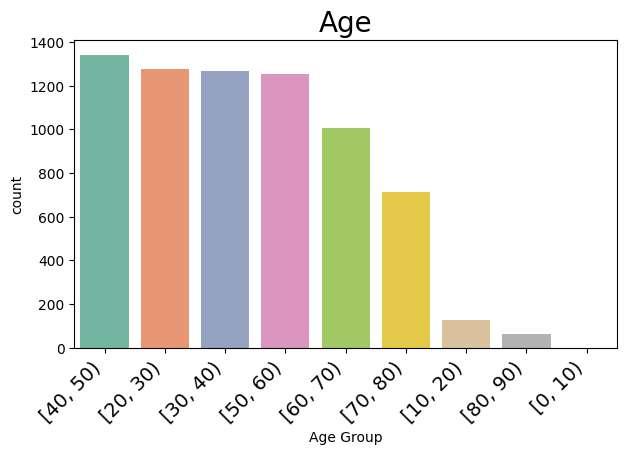

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a countplot with age binning
def fig_countplot(churn, col, sort, bin_size=10):
    # Create bins for the Age column (change the bin size as needed)
    churn['Age Group'] = pd.cut(churn[col], bins=range(0, 100, bin_size), right=False)
    
    # Set up the figure
    fig = plt.figure(figsize=(7, 4))
    fig.set_facecolor('white')

    # Generate countplot with sorted values
    if sort:
        ax = sns.countplot(data=churn, x='Age Group', order=churn['Age Group'].value_counts().index, palette='Set2')
    else:
        ax = sns.countplot(data=churn, x='Age Group', palette='Set2')
    
    # Customize plot appearance
    ax.set_title(col, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
    plt.show()

# Call the function with the 'churn' DataFrame
fig_countplot(churn, 'Age', sort=True)


#### Age Distribution Pattern:

- The distribution of ages appears to be fairly spread across different age groups, indicating a diverse range of ages among the customers.
- There is a notable peak around the middle age range, suggesting a higher concentration of customers in this age group.

#### Variation:

- The spread of the bars indicates variability in the ages of customers, showing a mix of young, middle-aged, and older customers.


**Contract Types Distribution:**
   - There is a significant proportion of customers on month-to-month contracts compared to one-year or two-year contracts.


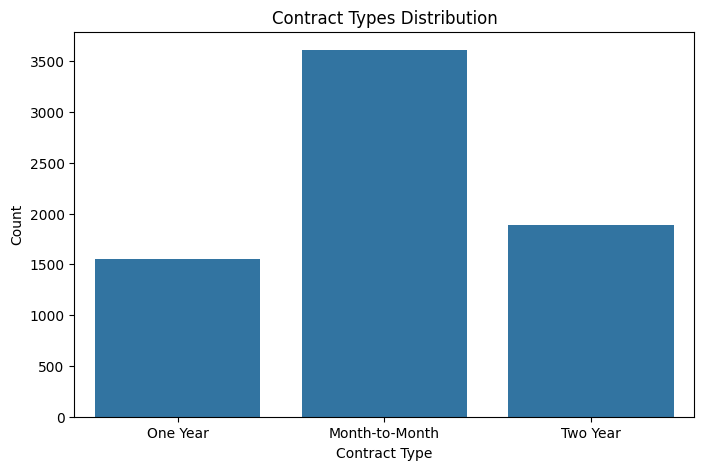

In [148]:
# Contract Types
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', data=churn)
plt.title('Contract Types Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

Most of the customers are on month to month contract type.

#### Diagnostic Analytics
**Churn by Tenure:**
   

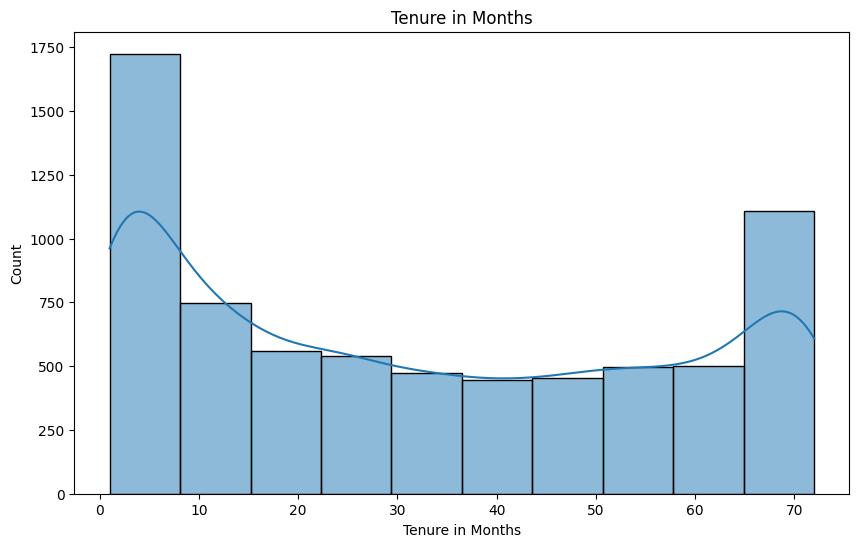

In [149]:
# Tenure in months
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Tenure in Months', bins=10, kde=True)
plt.title('Tenure in Months')
plt.xlabel('Tenure in Months')
plt.ylabel('Count')
plt.show()

- Customers with shorter tenures have higher churn rates. This suggests that newer customers are more likely to leave.

#### Monthly Charge Distribution

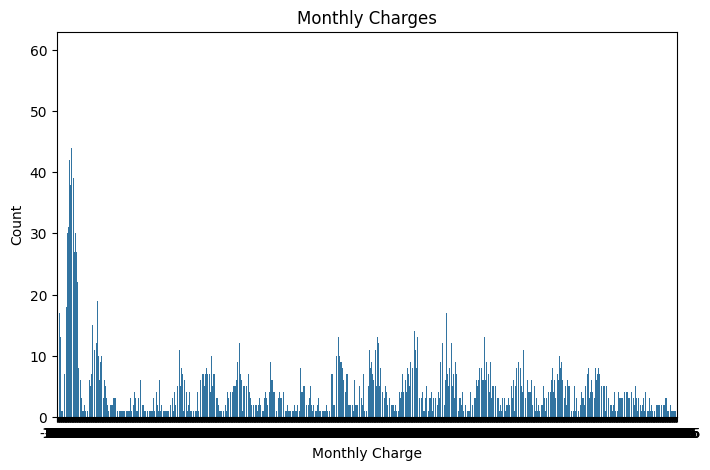

In [150]:
# Monthly Charge
plt.figure(figsize=(8, 5))
sns.countplot(x='Monthly Charge', data=churn)
plt.title('Monthly Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Count')
plt.show()

The histogram displays positive skewness (right skewed), meaning that most customers have lower monthly charges, with the number of customers decreasing as the monthly charges increase

**Churn by Total Charges:**
   - There is a visible trend where customers with higher monthly charges are more likely to churn.


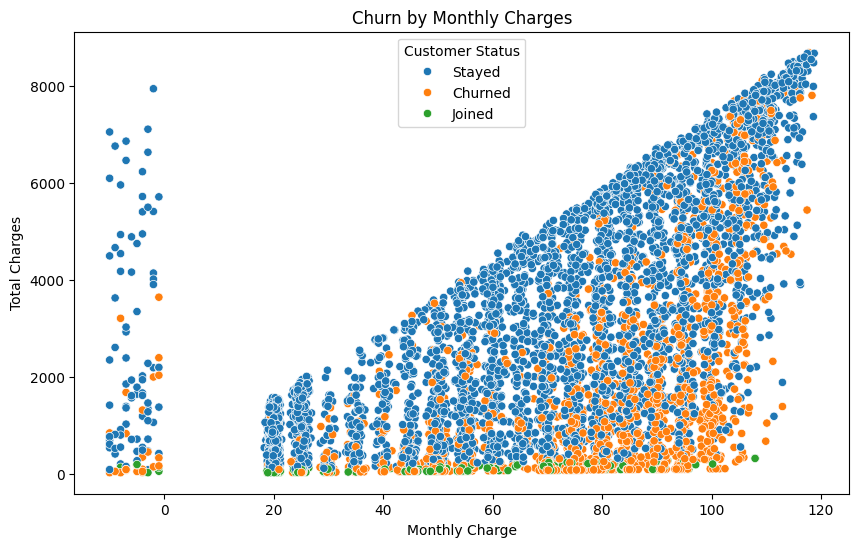

In [151]:
# Churn by Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn, x='Monthly Charge', y='Total Charges', hue='Customer Status')
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.show()


**Customer Status Clusters:**

- **Churned Customers:**
  - These data points are likely indicated by one color **(orange)**. They seem to be scattered across different levels of Monthly Charge and Total Charges.

- **Non-Churned Customers:**
  - These data points are indicated by another color **(blue)**. They also span various levels of Monthly Charge and Total Charges.

**Monthly Charge Trends:**

- **Higher Monthly Charges:**
  - Customers with higher Monthly Charge values are more dispersed, indicating that both churned and non-churned customers can have high monthly charges. However, there might be a slightly higher concentration of churned customers at the higher end of Monthly Charge.

- **Lower Monthly Charges:**
  - There seems to be a significant number of non-churned customers at lower monthly charges, suggesting that customers on lower plans might be less likely to churn.

**Business Strategy:**

- **Marketing and Retention:**
  - Targeted marketing strategies can be developed for different customer segments based on their monthly and total charges. For example, customers with high monthly charges who are close to churning could be offered special incentives to stay.

- **Plan Optimization:**
  - Understanding the reasons behind churn at different charge levels can help in optimizing the pricing and features of various plans to reduce churn rates.


#### Generate Box Plots for Customer Data Features

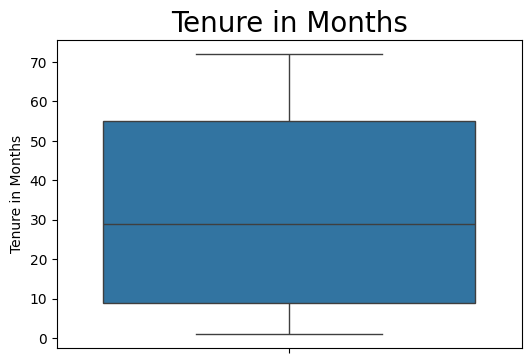

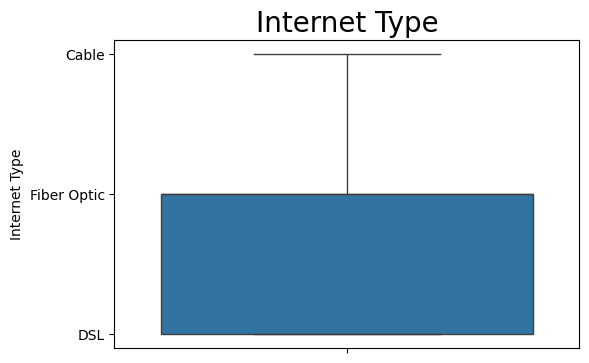

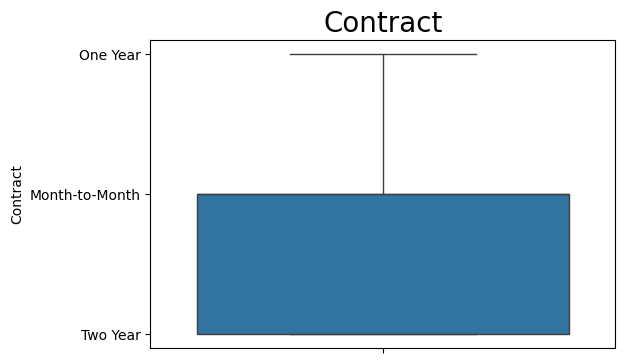

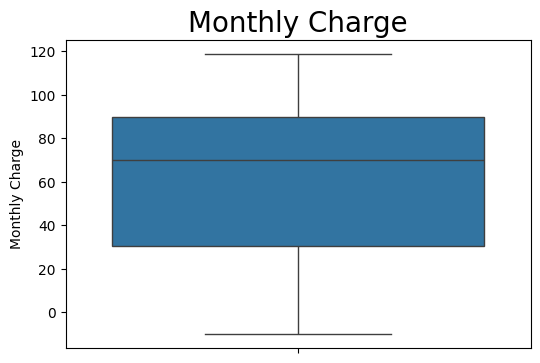

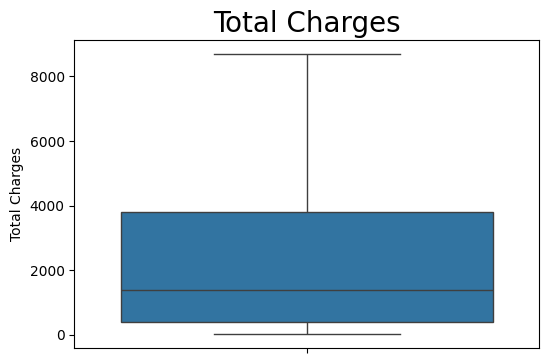

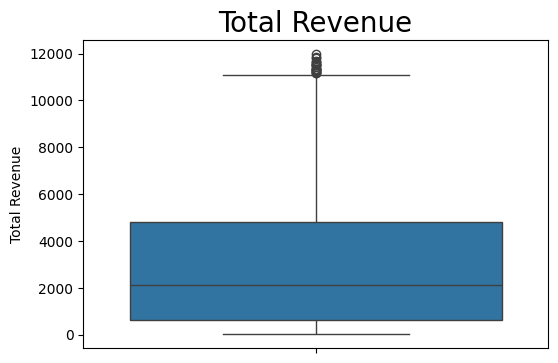

In [153]:
def fig_boxplot(churn, col):
    fig = plt.figure(figsize=(6, 4))
    fig.set_facecolor('white')
    sns.boxplot(churn[col])
    plt.title(col, fontsize=20)
    plt.show()

# List of columns for which box plots need to be generated
columns = [
       'Tenure in Months', 
       'Internet Type', 'Contract',
        'Monthly Charge', 'Total Charges',
              'Total Revenue']

# Loop through the columns and generate box plots
for col in columns:
    fig_boxplot(churn, col)

### Plot Distribution and Churn Rate by Demographic Feature


In [154]:
def printAvg(churn, col):
    print("Average: " + str(churn[col].mean()))


In [155]:
def fig_sub_count(df, col):
# for col in demographic:
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    fig.set_facecolor('white')
    
    sns.countplot(data=churn, x=col, palette='Accent', ax=ax[0])
    sns.countplot(data=churn, x=col, hue='Customer Status', palette='flare', ax=ax[1])
    
    # percentage
    for i in range(2):
        bars = ax[i].patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax[i].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
            ax[i].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")
    
    plt.show()
    

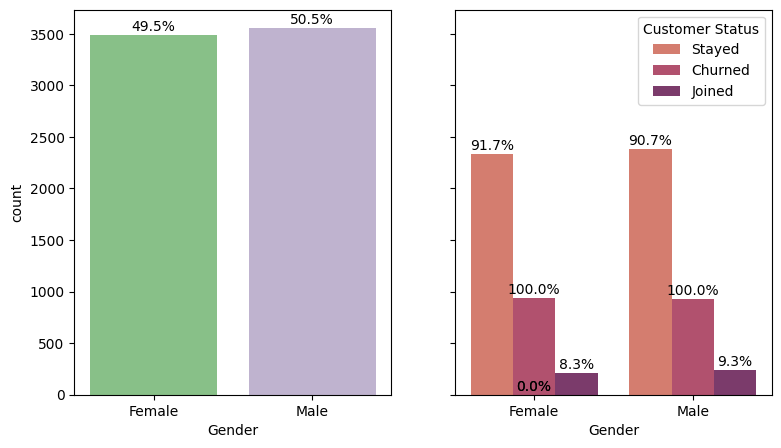

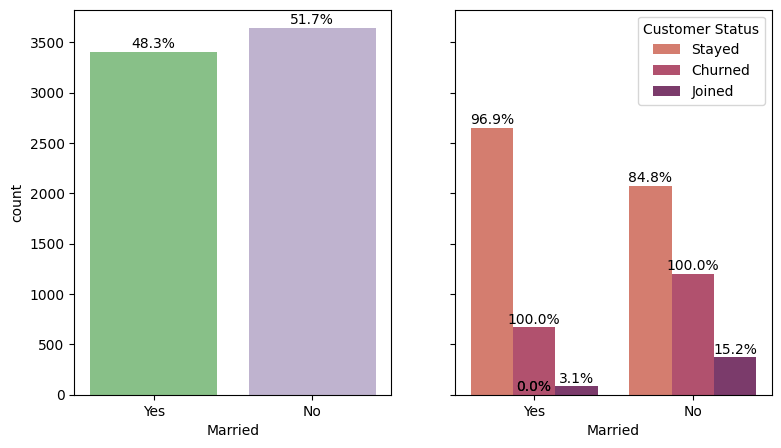

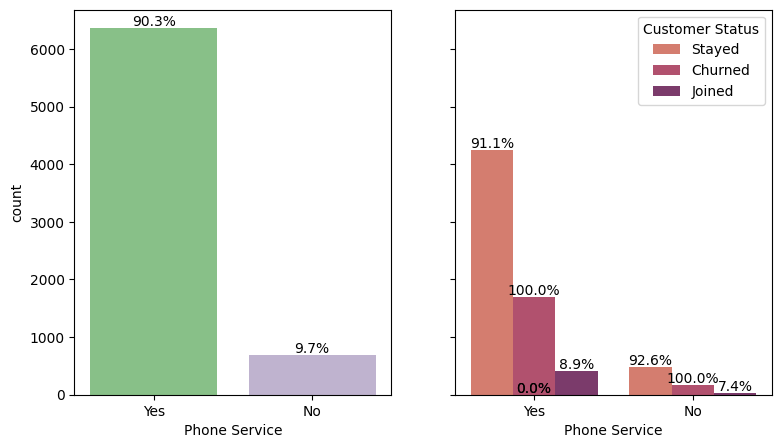

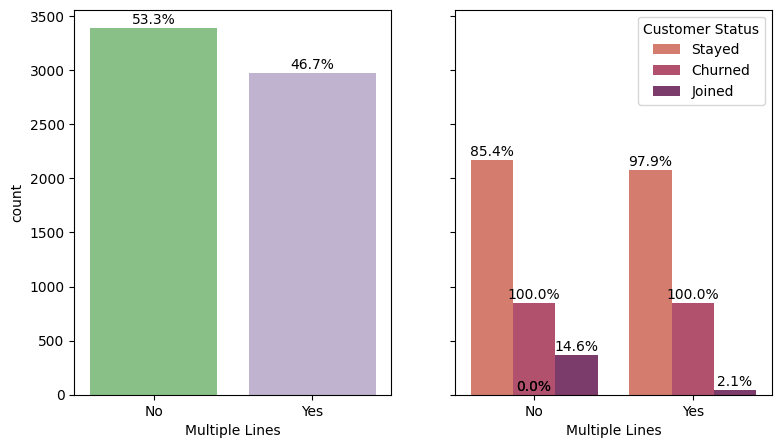

In [156]:
fig_sub_count(churn, 'Gender')
fig_sub_count(churn, 'Married')
fig_sub_count(churn, 'Phone Service')
fig_sub_count(churn, 'Multiple Lines')


Female and male customer count balanced and Churn ratio also similar, this mean there's no majority gender on customer and one gender don't tend to Churn.

### Heatmap Correlation

<Axes: >

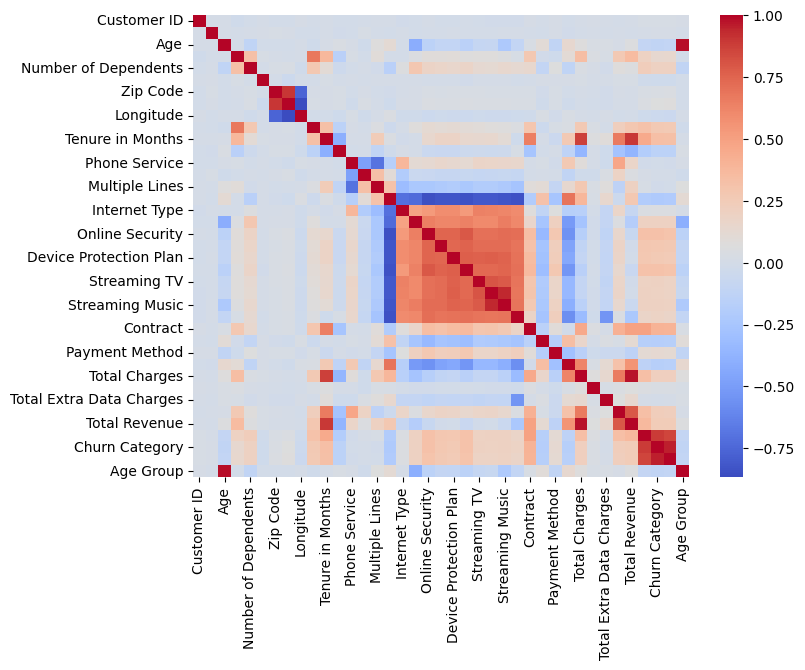

In [157]:
df_copy = churn.copy()

# temporary convert y/n categorical to 0 or 1
cat = ['Customer Status', 'Married', 'Number of Dependents', 'Phone Service', 'Monthly Charge']
for i in cat:
    df_copy[i].replace(to_replace='Yes', value=1, inplace=True)
    df_copy[i].replace(to_replace='No', value=0, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df_copy.apply(LabelEncoder().fit_transform)

fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('white')

feature_corr = df_copy.corr()
sns.heatmap(feature_corr, annot=False, cmap='coolwarm')

In [158]:
df_copy.corr().abs()['Customer Status'].sort_values(ascending = False)

Customer Status                      1.000000
Churn Category                       0.890340
Churn Reason                         0.860649
Contract                             0.490011
Tenure in Months                     0.446411
Total Revenue                        0.372443
Total Charges                        0.336197
Total Long Distance Charges          0.332990
Online Security                      0.317706
Premium Tech Support                 0.314826
Number of Referrals                  0.312558
Online Backup                        0.279546
Device Protection Plan               0.273988
Number of Dependents                 0.228119
Streaming Music                      0.202914
Avg Monthly GB Download              0.201620
Streaming Movies                     0.199822
Streaming TV                         0.197975
Internet Service                     0.196274
Married                              0.194998
Offer                                0.190509
Unlimited Data                    

Customer Status has high correlation with Churn category, churn reason,  Contract, Tenure in Months and Total Revenue

#### Feature importance

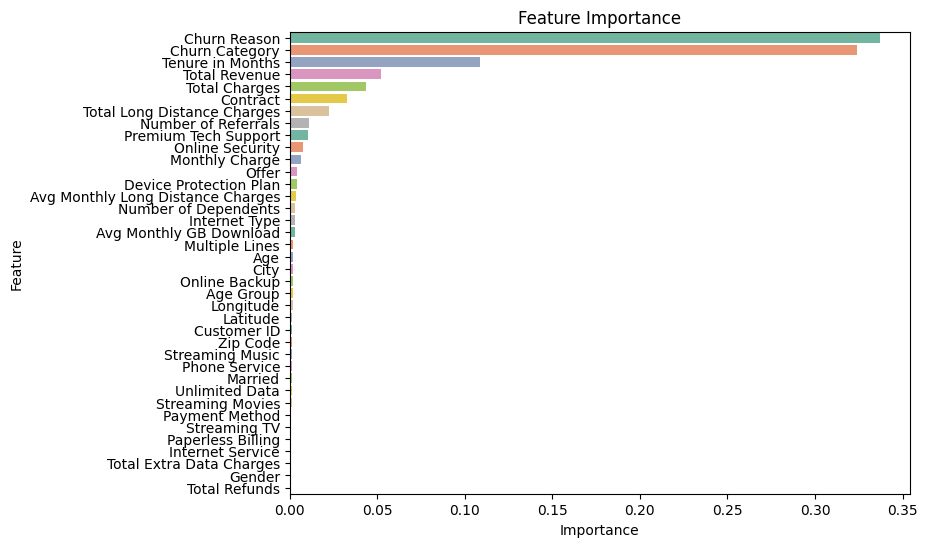

In [159]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Copy the dataset and prepare for model training
df_copy = churn.copy()

# Convert 'Yes'/'No' to 1/0 for the selected categorical columns
cat = ['Customer Status', 'Married', 'Number of Dependents', 'Phone Service', 'Monthly Charge']
for i in cat:
    df_copy[i].replace(to_replace='Yes', value=1, inplace=True)
    df_copy[i].replace(to_replace='No', value=0, inplace=True)

# Apply LabelEncoder to all columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df_copy.apply(le.fit_transform)

# Split the data into features (X) and target (y)
X = df_copy.drop('Customer Status', axis=1)
y = df_copy['Customer Status']

# Train a RandomForest model to get feature importance
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

# Get feature importance from the trained model
feature_importance = rf_clf.feature_importances_

# Create a DataFrame for feature importance
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='Set2')
plt.title('Feature Importance')
plt.show()


From Feature importance Customer Status has high correlation with Churn category, churn reason,  Contract, Tenure in Months and Total Revenue

### Data Cleaning/Pre-treatment for Machine Learning 
#### Handling Missing Values
1. **Identify Missing Values:**
   - Check for missing values in the dataset.


In [160]:
#let's check for number of missing entries in each column
#churn.isnull().sum()
null_values_train = churn.isnull().sum()
print(null_values_train[null_values_train>0])

Offer                                3877
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Churn Category                       5174
Churn Reason                         5174
dtype: int64


2. **Remove Missing Values:**
   - For this analysis, imputted the missing values in other columns except `Churn Category`and `Churn Reason` .
   - The two columns `Churn Category`and`Churn Reason` have more than 50 % missing values, I dropped the columns.

In [161]:
# Drop 'Churn Category' and 'Churn Reason' columns
churn_df = churn.copy()
churn_df = churn_df.drop(columns=['Customer ID', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Churn Category', 'Churn Reason'])


In [162]:
churn_df.head()

,Gender,Age,Married,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Age Group
0,Female,37,Yes,9,NaN,Yes,42.39,No,Yes,Cable,...,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,"[30, 40)"
1,Male,46,No,9,NaN,Yes,10.69,Yes,Yes,Cable,...,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,"[40, 50)"
2,Male,50,No,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,...,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,"[50, 60)"
3,Male,78,Yes,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,...,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,"[70, 80)"
4,Female,75,Yes,3,NaN,Yes,7.38,No,Yes,Fiber Optic,...,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,"[70, 80)"



#### Encoding Categorical Variables
3. **Imputing missing values:**


In [163]:
# Define imputers for different types of columns
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical columns
num_cols = churn_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = churn_df.select_dtypes(include=['object']).columns

# Impute missing values
churn_df[num_cols] = num_imputer.fit_transform(churn_df[num_cols])
churn_df[cat_cols] = cat_imputer.fit_transform(churn_df[cat_cols])

# Check if there are any remaining missing values
missing_values = churn_df.isnull().sum()

print(missing_values[missing_values > 0])  


Series([], dtype: int64)


#### Encoding Categorical Variables
4. **One-Hot Encoding:**
   - Convert categorical variables into numerical form using one-hot encoding.



In [164]:
#showing the categorical columns
categorical_columns = churn_df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status', 'Age Group'],
      dtype='object')

In [165]:
# Count the number of classes in each categorical column
for col in categorical_columns:
    num_classes = churn_df[col].nunique()
    print(f"Column '{col}' is categorical and has {num_classes} classes.")


Column 'Gender' is categorical and has 2 classes.
Column 'Married' is categorical and has 2 classes.
Column 'Offer' is categorical and has 5 classes.
Column 'Phone Service' is categorical and has 2 classes.
Column 'Multiple Lines' is categorical and has 2 classes.
Column 'Internet Service' is categorical and has 2 classes.
Column 'Internet Type' is categorical and has 3 classes.
Column 'Online Security' is categorical and has 2 classes.
Column 'Online Backup' is categorical and has 2 classes.
Column 'Device Protection Plan' is categorical and has 2 classes.
Column 'Premium Tech Support' is categorical and has 2 classes.
Column 'Streaming TV' is categorical and has 2 classes.
Column 'Streaming Movies' is categorical and has 2 classes.
Column 'Streaming Music' is categorical and has 2 classes.
Column 'Unlimited Data' is categorical and has 2 classes.
Column 'Contract' is categorical and has 3 classes.
Column 'Paperless Billing' is categorical and has 2 classes.
Column 'Payment Method' is

In [166]:
#printing the caterogical information
categorical_info = {col: churn[col].nunique() for col in categorical_columns}

print(categorical_info)

{'Gender': 2, 'Married': 2, 'Offer': 5, 'Phone Service': 2, 'Multiple Lines': 2, 'Internet Service': 2, 'Internet Type': 3, 'Online Security': 2, 'Online Backup': 2, 'Device Protection Plan': 2, 'Premium Tech Support': 2, 'Streaming TV': 2, 'Streaming Movies': 2, 'Streaming Music': 2, 'Unlimited Data': 2, 'Contract': 3, 'Paperless Billing': 2, 'Payment Method': 3, 'Customer Status': 3, 'Age Group': 8}


In [167]:
#dropping the customer status which is our y axis
churn_df = churn_df.drop(['Customer Status'], axis = 1)
cat_columns = churn_df.select_dtypes(include=['object', 'category']).columns
cats = cat_columns.values

In [168]:
#the x axis output
cats

array(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music',
       'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Age Group'], dtype=object)

In [169]:
# One-hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)

encoded_data = encoder.fit_transform(churn_df[cats])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cats))

In [170]:
#first few rows for the x- axis
encoded_df

,Gender_Female,Gender_Male,Married_No,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_No,...,Payment Method_Credit Card,Payment Method_Mailed Check,"Age Group_[10, 20)","Age Group_[20, 30)","Age Group_[30, 40)","Age Group_[40, 50)","Age Group_[50, 60)","Age Group_[60, 70)","Age Group_[70, 80)","Age Group_[80, 90)"
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7039,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# label encoder for the y - variable which is customer status
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

custom_stat = churn['Customer Status']
custom_stat = label_encoder.fit_transform(custom_stat)
custome_stat = pd.Series(custom_stat, name = 'Customer Status')


In [172]:
# Adding the cutomer status to our cleaned dataset
df1 = churn_df.drop(cats, axis = 1)
final_df = pd.concat([custome_stat, df1], axis = 1)
final_df = pd.concat([final_df, encoded_df], axis = 1)

In [173]:
#viewing the first rows of our final data
final_df

,Customer Status,Age,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Payment Method_Credit Card,Payment Method_Mailed Check,"Age Group_[10, 20)","Age Group_[20, 30)","Age Group_[30, 40)","Age Group_[40, 50)","Age Group_[50, 60)","Age Group_[60, 70)","Age Group_[70, 80)","Age Group_[80, 90)"
0,2,37.0,9.0,42.390000,16.0,65.60,593.30,0.00,0.0,381.51,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,46.0,9.0,10.690000,10.0,-4.00,542.40,38.33,10.0,96.21,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,50.0,4.0,33.650000,30.0,73.90,280.85,0.00,0.0,134.60,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,78.0,13.0,27.820000,4.0,98.00,1237.85,0.00,0.0,361.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,75.0,3.0,7.380000,11.0,83.90,267.40,0.00,0.0,22.14,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,20.0,13.0,46.680000,59.0,55.15,742.90,0.00,0.0,606.84,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7039,0,40.0,22.0,16.200000,17.0,85.10,1873.70,0.00,0.0,356.40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7040,1,22.0,2.0,18.620000,51.0,50.30,92.75,0.00,0.0,37.24,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,2,21.0,67.0,2.120000,58.0,67.85,4627.65,0.00,0.0,142.04,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building the classification model:

Now, you can build a classification model using scikit-learn

In [174]:
#X = churn.drop(columns=['Customer Status'])
final_df1 = final_df.copy()
X = final_df1.drop('Customer Status', axis =1)
y = final_df1['Customer Status']

In [175]:
# Convert features to a NumPy array
X_array = X.to_numpy()

# Inspect the first few rows of the NumPy array
print(X_array[0:5])

[[ 3.70000e+01  9.00000e+00  4.23900e+01  1.60000e+01  6.56000e+01
   5.93300e+02  0.00000e+00  0.00000e+00  3.81510e+02  9.74810e+02
   1.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   1.00000e+00  1.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00
   1.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   0.00000e+00  1.00000e+00  1.00000e+00  0.00000e+00  0.00000e+00
   1.00000e+00  0.00000e+00  1.00000e+00  1.00000e+00  0.00000e+00
   1.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   1.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.60000e+01  9.00000e+00  1.06900e+01  1.00000e+01 -4.00000e+00
   5.42400e+02  3.83300e+01  1.00000e+01  9.62100e+01  6.10280e+02
   0.00000e+00  1.00000e+00  1.00000e+00  0.00000e+00  0.0000

In [176]:
# Inspect the first few rows of the NumPy array
y = np.asarray(final_df1['Customer Status'])
y [0:5]

array([2, 2, 0, 0, 0])

#### Normalizing the dataset:
Normalization helps in achieving this by ensuring that each feature contributes proportionately to the overall computation.

In [177]:
from sklearn.preprocessing import  MinMaxScaler

In [178]:
#the min-max normalization (0 to 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 
X[0:5]

array([[0.29508197, 0.11267606, 0.84483463, 0.1686747 , 0.58718447,
        0.06629356, 0.        , 0.        , 0.10702383, 0.07973337,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.44262295, 0.11267606, 0.19763169, 0.09638554, 0.04660194,
        0.06042003, 0.7698333 , 0.06666667, 0.0269895 , 0.04924912,
        0.        , 1.        , 1.        , 0. 

### Predictive Data Analytics[with data science and machine learning models; new foresights]
#### Train/Test dataset
1. Split the dataset into training and test sets (80-20 split).

In [179]:
#spliting the dataset into train(80) and test (20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 60) (5634,)
Test set: (1409, 60) (1409,)


### Building the classification model:
Now, you can build a classification model using scikit-learn

#### Model Selection and Training
1. Train a logistic regression model.

In [180]:
# Initialize and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) #training
LR


LogisticRegression(C=0.01, solver='liblinear')

#### Model Prediction:
    Use the trained model to predict the target variable on the test set.

In [181]:
#predicting the yhat
yhat = LR.predict(X_test)
yhat


array([0, 2, 2, ..., 2, 2, 0])

##### predict_proba returns estimates for all classes, ordered by the label of classes.
    So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [182]:
#predict proba
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.49692556, 0.05509416, 0.44798029],
       [0.03159461, 0.00893022, 0.95947517],
       [0.37772195, 0.08761483, 0.53466321],
       ...,
       [0.07279547, 0.01091254, 0.91629199],
       [0.09114752, 0.02362178, 0.8852307 ],
       [0.52192911, 0.13780978, 0.34026111]])

#### Model Evaluation:

    Evaluate the model using accuracy score and classification report to understand its performance.

#### Logistic Regression

In [183]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, yhat)
report = classification_report(y_test, yhat)
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")



Accuracy: 0.7750
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       380
           1       0.00      0.00      0.00        98
           2       0.80      0.92      0.86       931

    accuracy                           0.78      1409
   macro avg       0.50      0.51      0.50      1409
weighted avg       0.72      0.78      0.74      1409




**Comments on Classification Report:**

- **Class 0 (Non-Churn):**
  - **Precision:** 0.69
  - **Recall:** 0.63
  - **F1-Score:** 0.66
  - **Support:** 380

  The model performs moderately well in predicting Non-Churn customers, with a precision of 0.69 and a recall of 0.63. This indicates that while the model is somewhat effective at identifying Non-Churn customers, there is still room for improvement.

- **Class 1 (Joined):**
  - **Precision:** 0.00
  - **Recall:** 0.00
  - **F1-Score:** 0.00
  - **Support:** 98

  The model performs poorly for predicting Joined customers, as evidenced by the precision, recall, and F1-score all being 0. This suggests that the model struggles significantly to identify customers who joined.

- **Class 2 (Churn):**
  - **Precision:** 0.81
  - **Recall:** 0.92
  - **F1-Score:** 0.86
  - **Support:** 931

  The model performs well in predicting Churn, with a high precision of 0.81 and a recall of 0.92. This means that the model is quite effective at identifying customers who are likely to churn.

- **Overall Metrics:**
  - **Accuracy:** 0.78
  - **Macro Average:**
    - **Precision:** 0.50
    - **Recall:** 0.52
    - **F1-Score:** 0.51
  - **Weighted Average:**
    - **Precision:** 0.72
    - **Recall:** 0.78
    - **F1-Score:** 0.75

  The overall accuracy of the model is 0.78, indicating a decent performance. The macro average, which treats all classes equally, shows lower precision, recall, and F1-score compared to the weighted average, which accounts for the support of each class. The weighted average scores reflect the model’s better performance in predicting Churn compared to other classes.


### Confusion matrix
Another way of looking at the accuracy of the classifier is to look at confusion matrix.

In [184]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[239  19 122]
 [ 38  53   7]
 [ 92   7 832]]
Confusion matrix, without normalization
[[239  19 122]
 [ 38  53   7]
 [ 92   7 832]]


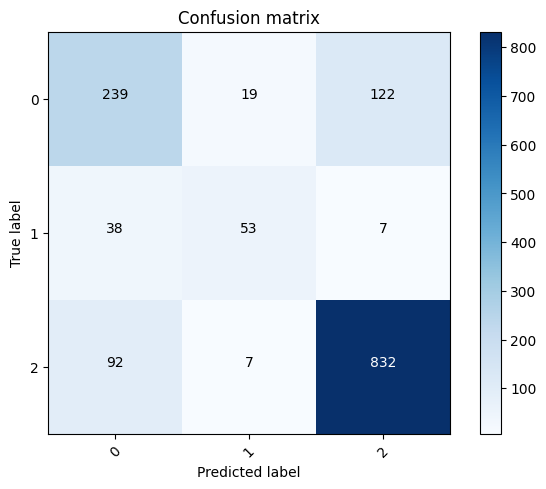

In [185]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Assume y_train and y_test are your target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train
                                             )
y_test_encoded = label_encoder.transform(y_test)

# Train your model with encoded labels
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_encoded)

# Predict using the trained model
yhat_encoded = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, yhat_encoded)
print(cm)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=label_encoder.classes_, title='Confusion matrix')


#### Model Evaluation
1. Assess the model's performance using metrics such as accuracy, precision, recall, and F1-score.

`Labels:` 

- **Stayed (False):** Customers who did not churn.
- **Churned (True):** Customers who churned.




#### Decision Tree

In [186]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X = final_df.drop('Customer Status', axis=1)
y = final_df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_clf.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       373
           1       0.66      0.53      0.59        97
           2       0.85      0.85      0.85       939

    accuracy                           0.75      1409
   macro avg       0.68      0.64      0.65      1409
weighted avg       0.75      0.75      0.75      1409



#### Classification Report Summary for Decision Tree Model

##### Performance Metrics by Class

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.52      | 0.54   | 0.53     | 373     |
| 1     | 0.66      | 0.53   | 0.59     | 97      |
| 2     | 0.85      | 0.85   | 0.85     | 939     |

#### Overall Metrics

- **Accuracy**: 0.75
- **Macro Average**:
  - Precision: 0.68
  - Recall: 0.64
  - F1-Score: 0.65
- **Weighted Average**:
  - Precision: 0.75
  - Recall: 0.75
  - F1-Score: 0.75

#### Detailed Analysis

##### Class 0 (Minority)
- **Precision (0.52)**: Slightly more than half of the predictions for class 0 are correct.
- **Recall (0.54)**: The model correctly identifies 54% of all actual class 0 instances.
- **F1-Score (0.53)**: Reflects moderate balance between precision and recall.

##### Class 1 (Minority)
- **Precision (0.66)**: Two-thirds of class 1 predictions are correct.
- **Recall (0.53)**: Captures slightly over half of the actual class 1 cases.
- **F1-Score (0.59)**: Indicates room for improvement in balancing recall and precision.

##### Class 2 (Majority)
- **Precision (0.85)** and **Recall (0.85)**: High accuracy and coverage, indicating strong model performance for this class.
- **F1-Score (0.85)**: Excellent, showing effective classification for the majority class.




### Random Forest Classifier

In [187]:
#use random forest to predict the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=50)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
yhat = rf_model.predict(X_test)

In [188]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X = final_df.drop('Customer Status', axis=1)
y = final_df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_clf.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.67      0.57      0.61       373
           1       0.70      0.52      0.60        97
           2       0.86      0.94      0.90       939

    accuracy                           0.81      1409
   macro avg       0.75      0.67      0.70      1409
weighted avg       0.80      0.81      0.80      1409




**Comments on Classification Report:**

- **Class 0 (Non-Churn):**
  - **Precision:** 0.75
  - **Recall:** 0.62
  - **F1-Score:** 0.68
  - **Support:** 373

  The model has a decent performance for predicting Non-Churn customers with a precision of 0.75 and a recall of 0.62. This indicates that the model is relatively accurate in identifying Non-Churn customers, though there's still room for improvement in capturing all Non-Churn cases.

- **Class 1 (Joined):**
  - **Precision:** 0.72
  - **Recall:** 0.60
  - **F1-Score:** 0.65
  - **Support:** 97

  For predicting Joined customers, the model performs reasonably well with a precision of 0.72 and a recall of 0.60. This shows that the model is somewhat effective at identifying Joined customers, but it misses some cases and could be improved.

- **Class 2 (Churn):**
  - **Precision:** 0.88
  - **Recall:** 0.96
  - **F1-Score:** 0.92
  - **Support:** 939

  The model excels in predicting Churn with a high precision of 0.88 and an impressive recall of 0.96. This suggests that the model is very effective at identifying customers who are likely to churn, correctly classifying most of them.

- **Overall Metrics:**
  - **Accuracy:** 0.84
  - **Macro Average:**
    - **Precision:** 0.78
    - **Recall:** 0.73
    - **F1-Score:** 0.75
  - **Weighted Average:**
    - **Precision:** 0.84
    - **Recall:** 0.84
    - **F1-Score:** 0.84

  The overall accuracy of the model is 0.84, indicating strong performance across all classes. The macro average scores reflect the model’s balanced performance, treating all classes equally, while the weighted average, which accounts for the support of each class, highlights good performance in predicting Churn. Overall, the model shows good effectiveness, particularly in identifying Churn customers.


## Recommendations

### 1. Model Choice

**Random Forest** should be preferred over **Logistic Regression** and **Decision Tree**. It has a higher Higher accuracy (0.81). Strong performance across all classes, particularly in balancing precision and recall for the minority class (class 1).
More robust against overfitting compared to decision trees, given its ensemble nature.

### 2. Future Work

- **Feature Engineering and Selection:**
  - Explore additional features or transformations that could improve model performance. Feature engineering can significantly impact the effectiveness of both models.

- **Hyperparameter Tuning:**
  - For Random Forest, experiment with hyperparameters such as the number of trees, maximum depth, and splitting criteria to further enhance performance.




### Key Factors Contributing to Customer Churn in the Telecom Industry

#### Understanding these factors can help in developing targeted strategies to reduce churn and improve customer retention.

- **Contract Type:**
  - Customers with shorter contract durations (month-to-month contracts) are more likely to churn compared to those with longer-term contracts. Long-term contracts provide more stability and commitment from customers.

- **Monthly Charges:**
  - Higher monthly charges are associated with a higher likelihood of churn. Customers with higher bills may seek more affordable options or feel that they are not getting sufficient value for the cost.

- **Total Charges:**
  - The total amount charged over the customer’s tenure also impacts churn. Customers with higher total charges are more prone to churn, potentially due to accumulated dissatisfaction or financial burden.

- **Customer Tenure:**
  - Customers with shorter tenure (newer customers) have a higher tendency to churn. This suggests that the initial months are crucial for customer satisfaction and retention efforts.

- **Service Issues and Support:**
  - Technical support, service issues, and the quality of customer service play a significant role in customer satisfaction. Poor support or unresolved issues can drive customers to switch providers.

- **Additional Services:**
  - The presence of additional services such as internet service, online security, and tech support influences churn. Customers who subscribe to multiple services from the provider are less likely to churn, indicating a higher perceived value and dependency.

- **Demographic Factors:**
  - Age, gender, and other demographic factors also play a role in customer churn. Certain age groups or genders may have different preferences and tolerances for service issues, influencing their churn behavior.

- **Payment Methods:**
  - The method of payment and the flexibility offered can impact churn rates. Customers preferring electronic payments or autopay may have different churn behaviors compared to those using traditional methods.

- **Promotions and Offers:**
  - Promotional offers, discounts, and loyalty rewards can effectively reduce churn by increasing the perceived value and satisfaction of the customers.


### Strategic Recommendations:

- **Enhance Customer Engagement:**
  - Focus on improving customer engagement during the initial months of the contract. Providing excellent onboarding experiences and proactive support can reduce early churn.

- **Review Pricing Strategies:**
  - Consider revising pricing strategies to offer competitive and affordable pricing options, particularly for customers on higher monthly charges.

- **Improve Service Quality:**
  - Address service quality issues promptly and enhance technical support to ensure customer satisfaction. Invest in training for customer service representatives to handle issues more effectively.

- **Offer Long-Term Contracts:**
  - Promote longer-term contracts with incentives to encourage customers to commit for extended periods. This can provide more stability in customer retention.

- **Expand Value-Added Services:**
  - Encourage customers to subscribe to additional services by highlighting the benefits and providing bundled offers.

- **Personalize Retention Efforts:**
  - Use customer data to personalize retention efforts. Tailored offers, loyalty programs, and targeted communications can enhance customer satisfaction and loyalty.
